In [1]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_json('Testfil_samtliga.json')

# Define the list of words to search for
word_list = ['stark', 'drivkraft', 'chef', 'analys', 'analytisk', 'driven', 'individer', 'bevisad', 'arbetskraft', 'beslut']

# Create an empty dictionary to store the counts
word_counts = {}

# Loop over each word in the word list
for word in word_list:
    # Count the number of times the word appears in the description.text column
    count = df['description.text'].str.count(word).sum()
    # Add the word and count to the dictionary
    word_counts[word] = count

# Print the word counts
for word, count in word_counts.items():
    print(f'The word "{word}" appears {int(count)} times in the description.text column.')


The word "stark" appears 957 times in the description.text column.
The word "drivkraft" appears 147 times in the description.text column.
The word "chef" appears 848 times in the description.text column.
The word "analys" appears 1051 times in the description.text column.
The word "analytisk" appears 316 times in the description.text column.
The word "driven" appears 804 times in the description.text column.
The word "individer" appears 86 times in the description.text column.
The word "bevisad" appears 2 times in the description.text column.
The word "arbetskraft" appears 12 times in the description.text column.
The word "beslut" appears 515 times in the description.text column.


2023-05-05 09:58:37.088 
  command:

    streamlit run C:\Users\kevin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

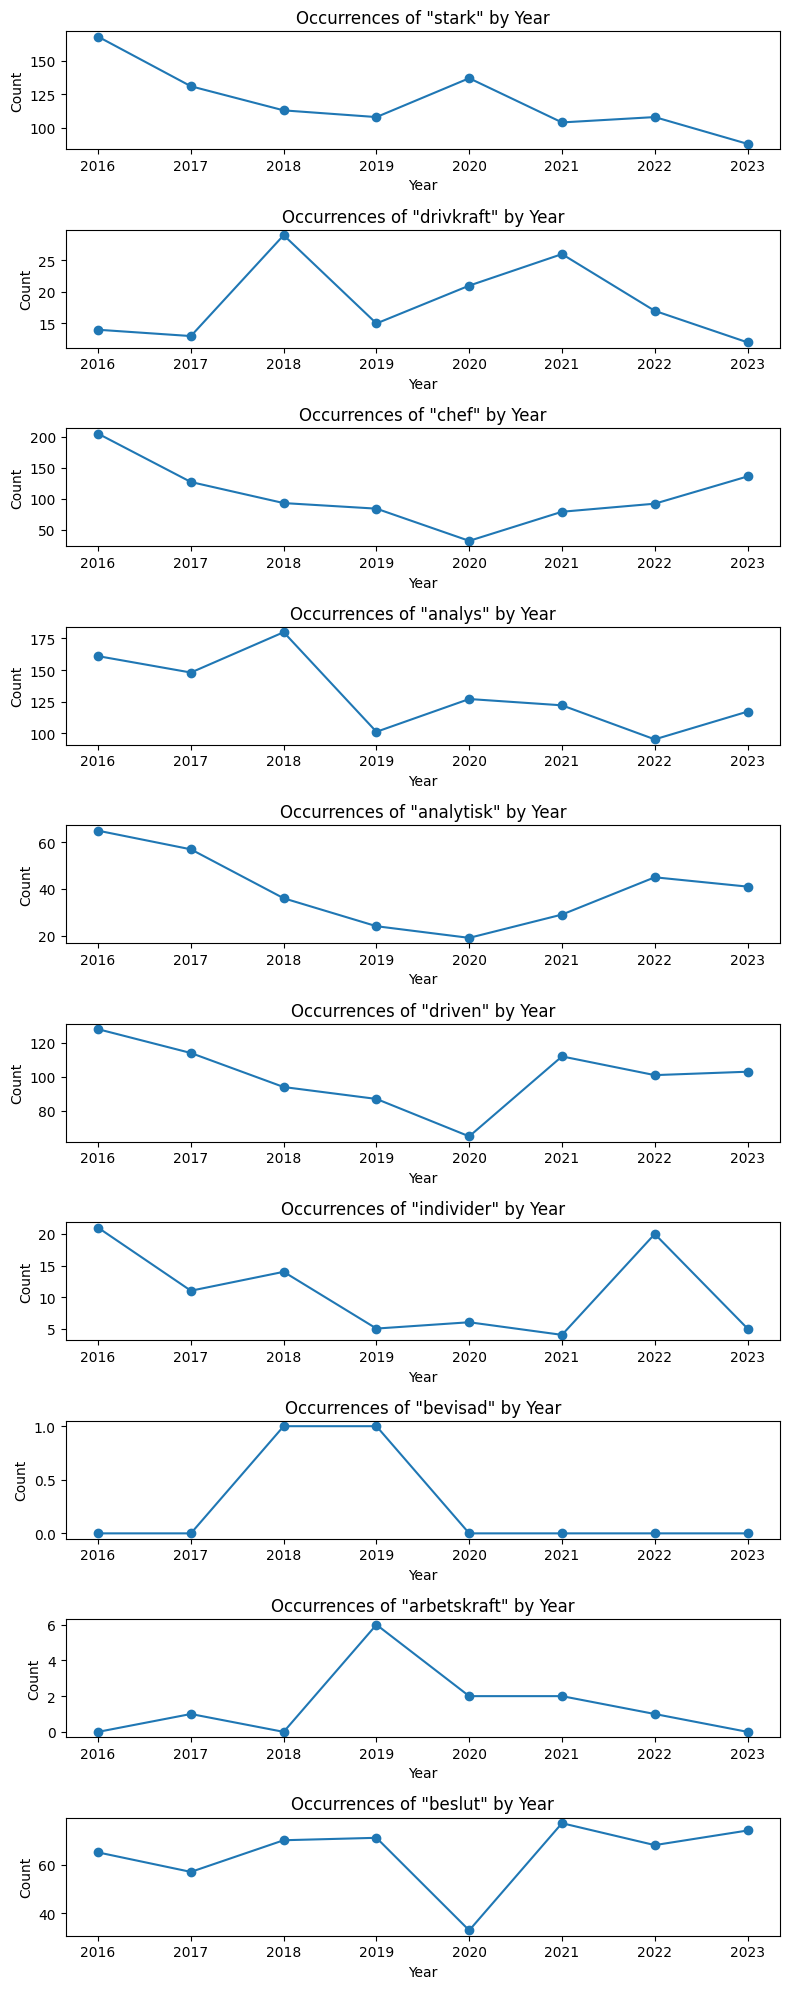

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st


# Convert the publication_date column to a pandas datetime column
df['publication_date'] = pd.to_datetime(df['publication_date'], format='mixed')

# Create an empty dictionary to store the counts by year
yearly_word_counts = {}

# Loop over each year in the data
for year in df['publication_date'].dt.year.unique():
    # Filter the data to only include rows from the current year
    year_df = df[df['publication_date'].dt.year == year]
    # Create an empty dictionary to store the counts for the current year
    word_counts = {}
    # Loop over each word in the word list
    for word in word_list:
        # Count the number of times the word appears in the description.text column for the current year
        count = year_df['description.text'].str.count(word).sum()
        # Add the word and count to the dictionary
        word_counts[word] = count
    # Add the year and word counts to the dictionary of yearly counts
    yearly_word_counts[year] = word_counts

# Create a figure with subplots for each word in the word list
fig, axs = plt.subplots(nrows=len(word_list), figsize=(8, 20))

# Loop over each word in the word list
for i, word in enumerate(word_list):
    # Create lists of years and counts for the current word
    years = list(yearly_word_counts.keys())
    counts = [yearly_word_counts[year][word] for year in years]
    # Plot the counts by year for the current word
    axs[i].plot(years, counts, marker='o')
    axs[i].set_title(f'Occurrences of "{word}" by Year')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Count')

# Set the tight layout for the figure
plt.tight_layout()

# Display the figure using Streamlit
st.pyplot(fig)